## **1. Data Preparation**

### 1.1 Import Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.2 Import Dataset

In [41]:
df = pd.read_csv('./dataset/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,...,106.836118,-6.204699,0.18,45.09,0.0,3.23,7.16%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,...,106.836118,-6.204699,0.18,45.27,0.0,3.23,7.13%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,10,624,...,107.603708,-6.920432,0.07,0.27,0.0,0.22,83.33%,5200.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,2,8,...,101.805109,0.511648,0.16,0.33,0.0,0.33,100.00%,400.00%,NaN,NaN


## **2. Exploratory Data Analysis**

### 2.1 Memahami Isi Data

Sumber dataset berasal dari kaggle.com, disusun oleh Hendratno. Data disusun berdasarkan time series, baik di tingkat negara (Indonesia), maupun di tingkat provinsi. Data didapatkan dari berbagai sumber yaitu [covid19.go.id](https://covid19.go.id), [kemendagri.go.id](https://kemendagri.go.id), [bps.go.id](https://bps.go.id), [bnpb-inacovid19.hub.arcgis.com](https://bnpb-inacovid19.hub.arcgis.com)

In [42]:
#highlight 5 data teratas
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,...,106.836118,-6.204699,0.18,45.09,0.0,3.23,7.16%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,...,106.836118,-6.204699,0.18,45.27,0.0,3.23,7.13%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,10,624,...,107.603708,-6.920432,0.07,0.27,0.0,0.22,83.33%,5200.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,2,8,...,101.805109,0.511648,0.16,0.33,0.0,0.33,100.00%,400.00%,NaN,NaN


In [43]:
# melihat tipe data di tiap kolom/feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13014 entries, 0 to 13013
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         13014 non-null  object 
 1   Location ISO Code            13014 non-null  object 
 2   Location                     13014 non-null  object 
 3   New Cases                    13014 non-null  int64  
 4   New Deaths                   13014 non-null  int64  
 5   New Recovered                13014 non-null  int64  
 6   New Active Cases             13014 non-null  int64  
 7   Total Cases                  13014 non-null  int64  
 8   Total Deaths                 13014 non-null  int64  
 9   Total Recovered              13014 non-null  int64  
 10  Total Active Cases           13014 non-null  int64  
 11  Location Level               13014 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Dataset memiliki 37 feature/kolom, terdiri dari 12 feature dengan tipe data numerikal dan 25 feature dengan tipe data numerikal(12 kolom dengan tipe data integer dan 13 kolom dengan tipe data float)

In [44]:
# melihat dimensi dari dataset
df.shape

(13014, 37)

In [45]:
# melihat summary statistics dari tiap kolom
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
count,13014.000000,13014.000000,13014.000000,13014.000000,1.301400e+04,13014.000000,1.301400e+04,13014.000000,0.0,13014.000000,...,1.301400e+04,13014.000000,13014.000000,13014.000000,13014.000000,13014.000000,13014.000000,13014.000000,12071.000000,11367.000000
mean,229.870678,6.159521,204.068465,19.642692,2.496575e+04,769.013370,2.047353e+04,3723.197710,NaN,24.407331,...,1.567663e+07,756.893061,113.664259,-2.733003,16.141075,1790.045239,0.367225,45.664902,1.455591,1.045951
std,925.079589,23.731329,849.104101,260.967245,1.106131e+05,3161.067362,9.398453e+04,14538.525964,NaN,69.394459,...,4.526533e+07,2773.772723,9.861775,3.600992,30.807969,3163.520044,0.818305,64.553927,3.308223,1.629915
min,0.000000,0.000000,0.000000,-5003.000000,1.000000e+00,0.000000,0.000000e+00,-1195.000000,NaN,1.000000,...,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,-6.000000,3.710000e+02,11.000000,2.310000e+02,97.250000,NaN,7.000000,...,1.999539e+06,47.790000,106.109004,-6.204699,1.140000,100.070000,0.000000,3.080000,0.590000,0.670000
50%,29.000000,0.000000,17.000000,2.000000,3.160500e+03,88.000000,2.077000e+03,607.000000,NaN,11.000000,...,4.216171e+06,103.840000,113.417654,-2.461746,6.330000,738.260000,0.000000,22.740000,1.000000,1.000000
75%,98.000000,3.000000,81.000000,25.000000,1.064200e+04,362.000000,8.122750e+03,1924.500000,NaN,18.000000,...,9.095591e+06,262.700000,121.201093,0.212037,17.617500,2313.972500,0.490000,65.647500,1.330000,1.000000
max,14518.000000,476.000000,13038.000000,5279.000000,1.496085e+06,40449.000000,1.331400e+06,176672.000000,NaN,416.000000,...,2.651855e+08,16334.310000,138.696030,4.225615,428.740000,35007.000000,36.960000,582.330000,120.500000,102.000000


In [46]:
# melihat data null dalam dataset
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                13014
Province                         392
Country                            0
Continent                          0
Island                           392
Time Zone                        392
Special Status                 11136
Total Regencies                    0
Total Cities                     366
Total Districts                    0
Total Urban Villages             368
Total Rural Villages             393
Area (km2)                         0
Population                         0
Population Density                 0
L

In [47]:
# melihat korelasi/hubungan tiap data antar kolom/feature
df.corr()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.918576,0.958209,0.343573,0.890164,0.882828,0.872296,0.941686,NaN,0.682013,...,0.697288,0.147061,-0.039206,-0.019609,0.261735,0.231105,0.162800,0.249117,-0.015994,0.037156
New Deaths,0.918576,1.000000,0.904394,0.222633,0.848584,0.881972,0.828213,0.910498,NaN,0.726793,...,0.744071,0.083007,-0.036442,-0.029887,0.148074,0.152326,0.219888,0.216226,-0.026150,0.114790
New Recovered,0.958209,0.904394,1.000000,0.060748,0.928205,0.910516,0.915037,0.948791,NaN,0.660303,...,0.674878,0.156593,-0.040258,-0.017355,0.246704,0.261253,0.175224,0.274917,-0.025797,0.046464
New Active Cases,0.343573,0.222633,0.060748,1.000000,0.058215,0.086725,0.039572,0.168239,NaN,0.203101,...,0.208256,0.004254,-0.004677,-0.010325,0.111643,-0.044661,-0.013024,-0.031083,0.029572,-0.029985
Total Cases,0.890164,0.848584,0.928205,0.058215,1.000000,0.973711,0.998495,0.941775,NaN,0.619904,...,0.631008,0.130380,-0.032919,-0.011901,0.200965,0.284489,0.146838,0.309508,-0.024725,0.038025
Total Deaths,0.882828,0.881972,0.910516,0.086725,0.973711,1.000000,0.966884,0.940400,NaN,0.669254,...,0.685396,0.078160,-0.032837,-0.027557,0.133088,0.197349,0.127596,0.284681,-0.027821,0.029899
Total Recovered,0.872296,0.828213,0.915037,0.039572,0.998495,0.966884,1.000000,0.922082,NaN,0.595772,...,0.606760,0.140057,-0.034197,-0.011872,0.208550,0.302966,0.150104,0.323248,-0.024231,0.036211
Total Active Cases,0.941686,0.910498,0.948791,0.168239,0.941775,0.940400,0.922082,1.000000,NaN,0.719510,...,0.729445,0.069565,-0.022251,-0.007808,0.151889,0.163033,0.119094,0.203286,-0.025417,0.048734
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.682013,0.726793,0.660303,0.203101,0.619904,0.669254,0.595772,0.719510,NaN,1.000000,...,0.980713,-0.065111,0.013175,0.074546,-0.032059,-0.032802,-0.005730,-0.006161,-0.023307,0.010707


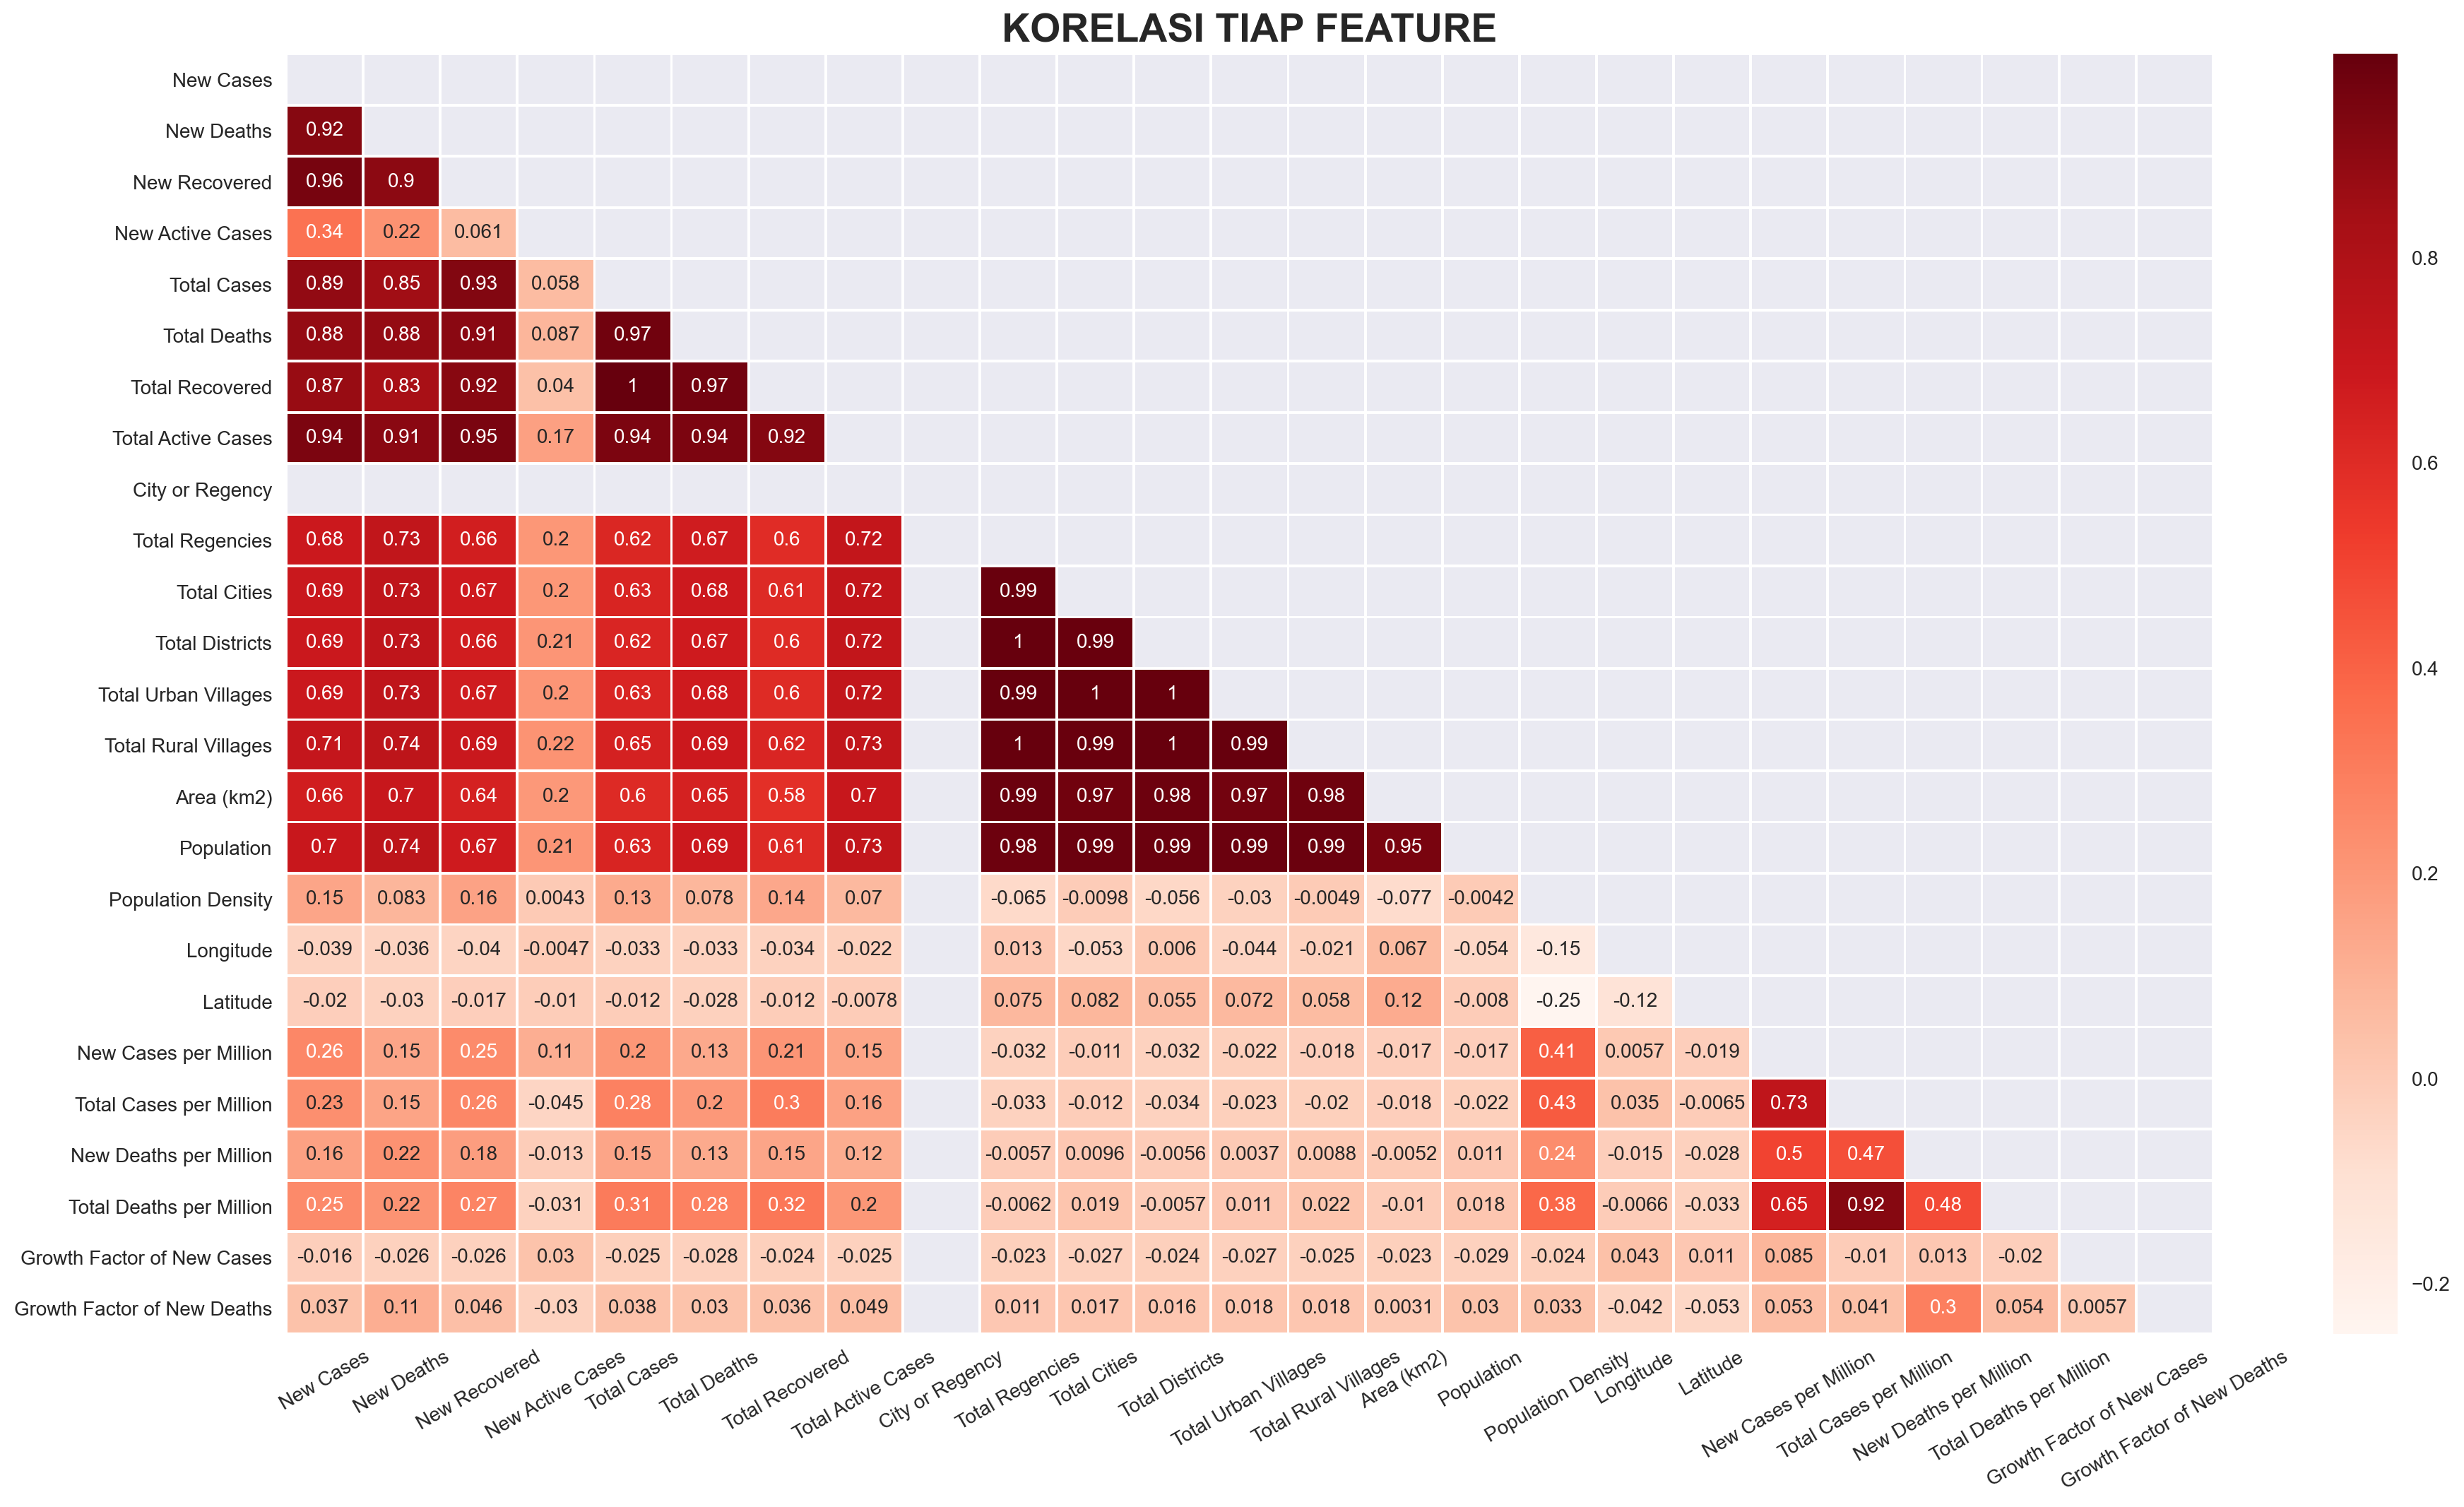

In [48]:
mask = np.triu(df.corr())

plt.style.use('seaborn')
fg, ax = plt.subplots(figsize=(22, 12), dpi=200)
sns.heatmap(df.corr(), mask=mask, cmap='Reds', annot=True, linewidths=1)
plt.title('KORELASI TIAP FEATURE', fontweight='bold', fontsize=20)
plt.xticks(rotation=30)
plt.show()

In [49]:
# menambahkan kolom tahun
df['Year'] = df['Date'].str[-4:]
df['Year'] = df['Year'].astype('int32')

### 2.2 Analisa Data

#### **Q1: Per tanggal berapa kasus baru COVID-19 terbanyak ditemukan dalam satu hari?**

**A1.1 : Urutan 10 tanggal dengan kasus COVID-19 paling banyak**

In [50]:
top_10_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases']][:10]
top_10_date_new_cases

,Date,New Cases
0,1/30/2021,14518
1,1/16/2021,14224
2,1/29/2021,13802
3,1/28/2021,13695
4,1/22/2021,13632
5,1/26/2021,13094
6,1/15/2021,12818
7,1/20/2021,12568
8,1/23/2021,12191
9,2/6/2021,12156


Berdasarkan urutan data di atas, kasus COVID-19 paling banyak ditemukan dalam satu hari yaitu pada tanggal 30 Januari 2021 sebanyak 14.518 kasus baru. Hal menariknya yaitu 9 dari 10 tanggal teratas dengan kasus COVID-19 per hari terbanyak berada pada bulan Januari 2021, artinya kasus cenderung naik pada bulan Januari 2021 dan mencapai puncaknya pada akhir bulan.

**A1.2 : Visualisasi kenaikan 'New Cases' berdasarkan urutan 10 tanggal dengan kasus COVID-19 paling banyak per hari**

In [51]:
top_10_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases']][:10]
x = list(top_10_date_new_cases.sort_values(by='Date').to_dict()['Date'].values())
y = list(top_10_date_new_cases.sort_values(by='Date').to_dict()['New Cases'].values())

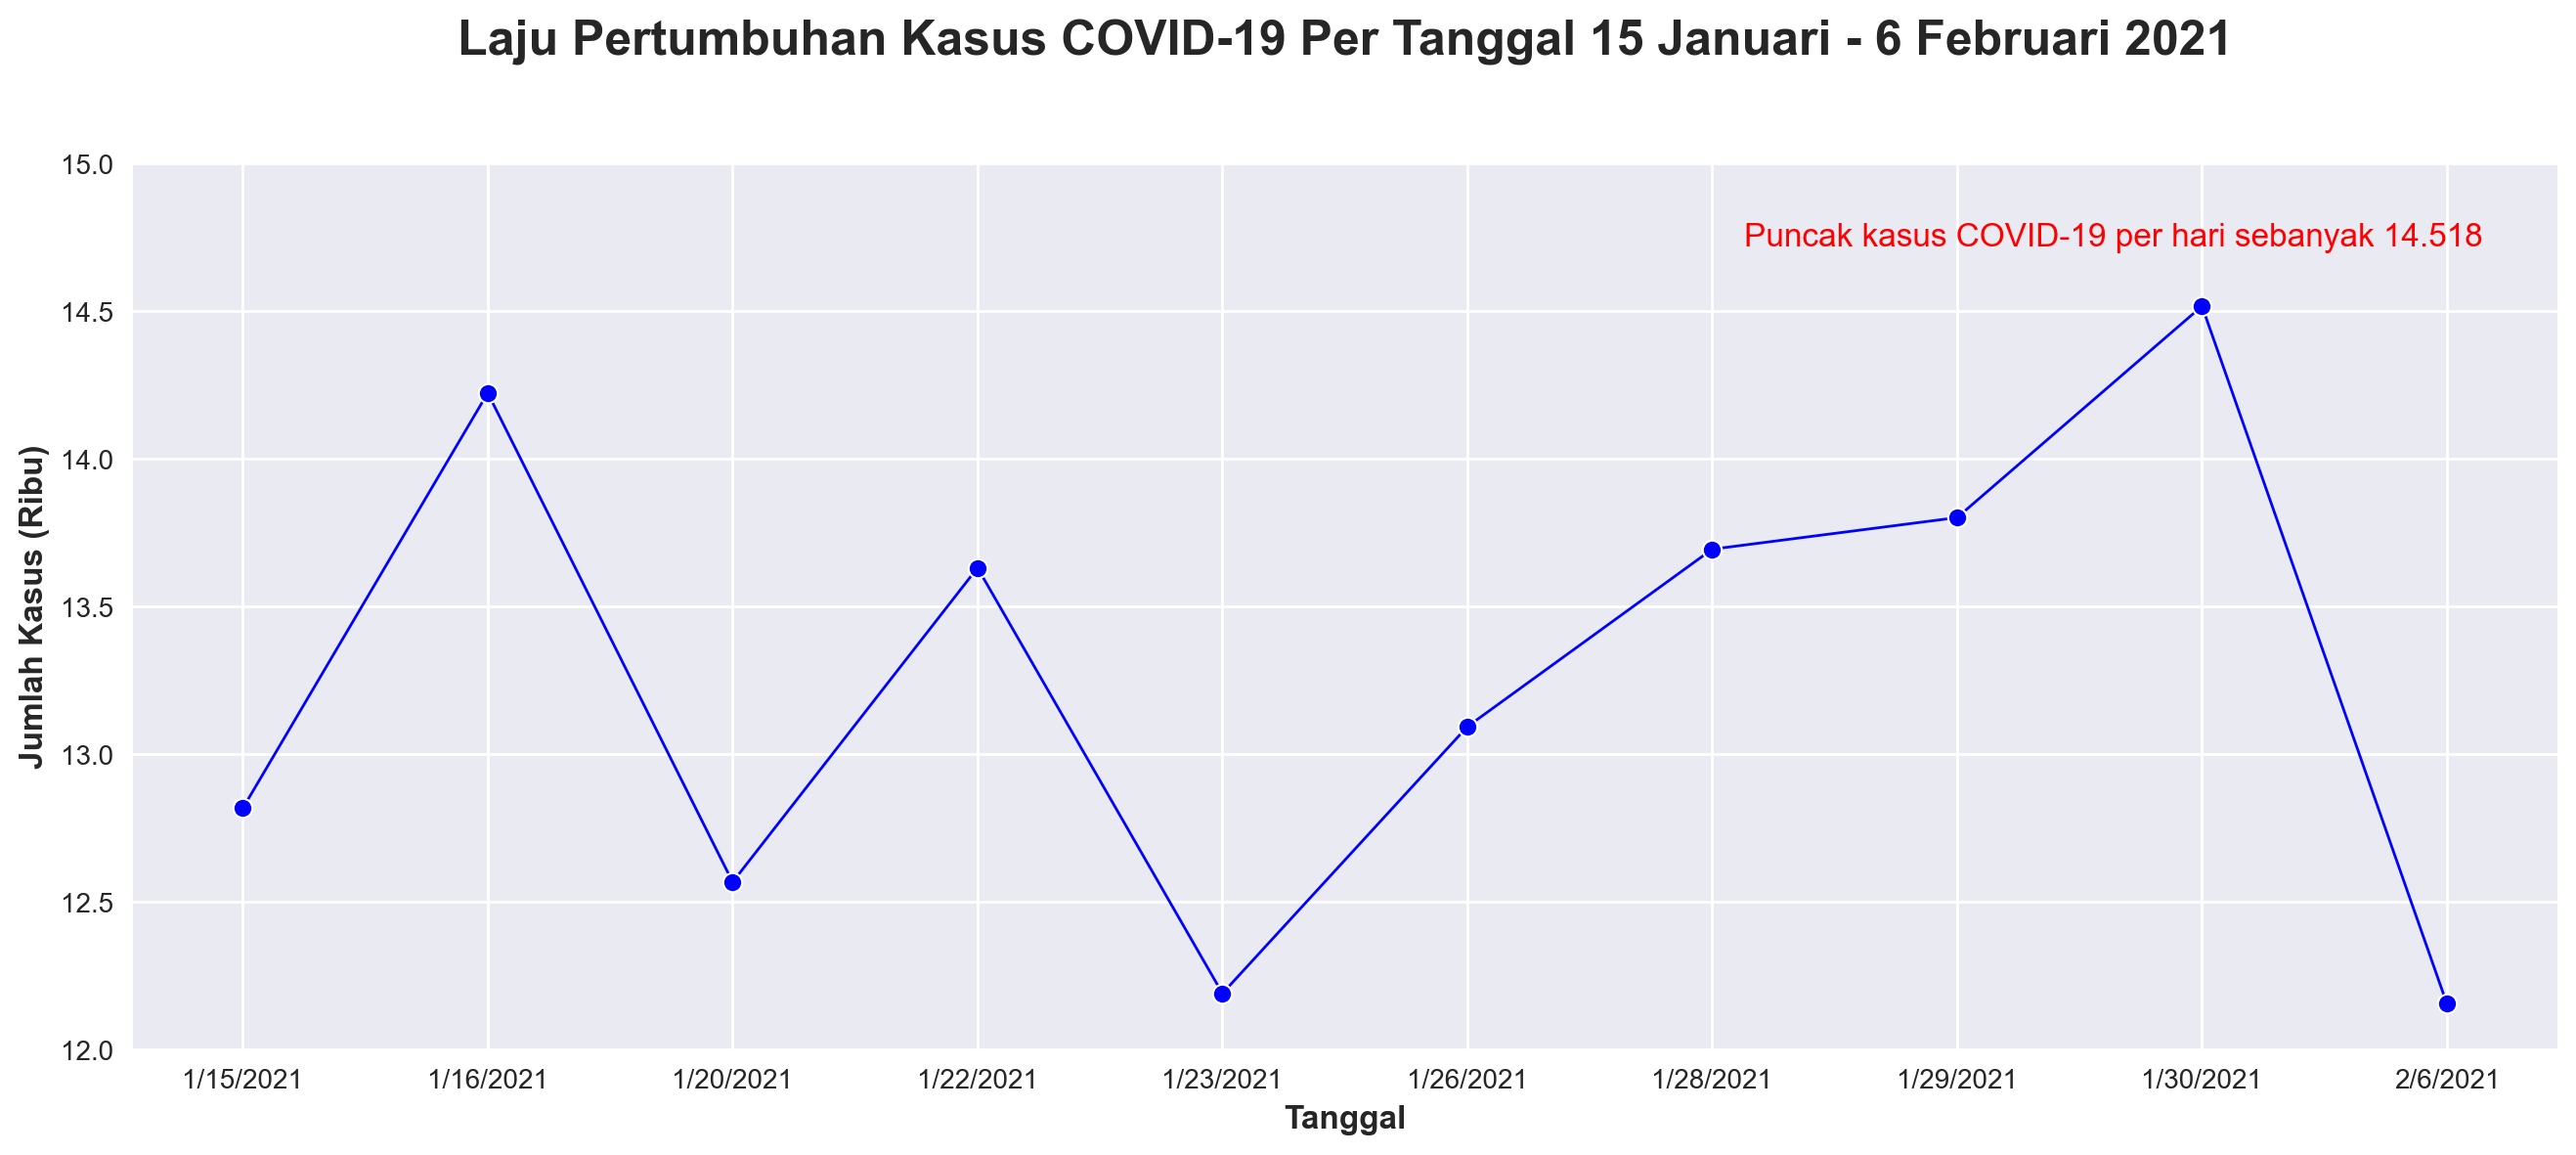

In [52]:
plt.style.use('seaborn')
fg, ax = plt.subplots(figsize=(16,6), dpi=200)
sns.lineplot(x=x, y=y, color='blue', marker='o', linewidth=1)
plt.ylim(ymin=12000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(float))
plt.text(0.64, 0.81, 'Puncak kasus COVID-19 per hari sebanyak 14.518', fontsize=12,transform=fg.transFigure, color='red')
plt.title('Laju Pertumbuhan Kasus COVID-19 Per Tanggal 15 Januari - 6 Februari 2021', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Tanggal', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kasus (Ribu)', fontsize=12, fontweight='bold')
plt.show()

Berdasarkan visualisasi di atas, pertumbuhan kasus dimulai semenjak pertengahan bulan. Lalu sempat naik turun hingga mencapai kasus minimal pada 23 Januari, namun justru setelah itu peningkatan kasus COVID-19 per hari semakin melonjak hingga mencapai puncaknya pada 30 Januari sebanyak 14.518 kasus per hari.

#### Q2: Provinsi mana saja yang memiliki kasus baru terbanyak per hari? 

**A2.1: Urutan 5 provinsi dengan penemuan kasus COVID-19 per hari terbanyak**

In [53]:
df_not_ll = df.loc[df['Location Level'] == 'Province'].sort_values(by='New Cases', ascending=False)[['Province', 'New Cases']]
df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]

,New Cases
Province,
DKI Jakarta,379204
Jawa Barat,246779
Jawa Tengah,167265
Jawa Timur,138706
Kalimantan Timur,63088


Provinsi DKI Jakarta memiliki total kasus per hari tertinggi sebanyak 379.204 kasus, Diikuti oleh Jawa Barat, Jawa Tengah, Jawa Timur, dan Kalimantan Timur. Angka ini didapat dengan menjumlahkan kasus per hari dari tiap provinsi, lalu mengurutkan 5 provinsi dengan jumlah kasus per hari tertinggi.

**A2.2: Visualisasi perbandingan antar provinsi dengan total penemuan kasus COVID-19 per hari terbanyak**

In [54]:
a22 = df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]
x = list(a22.to_dict()['New Cases'].keys())
y = list(a22.to_dict()['New Cases'].values())

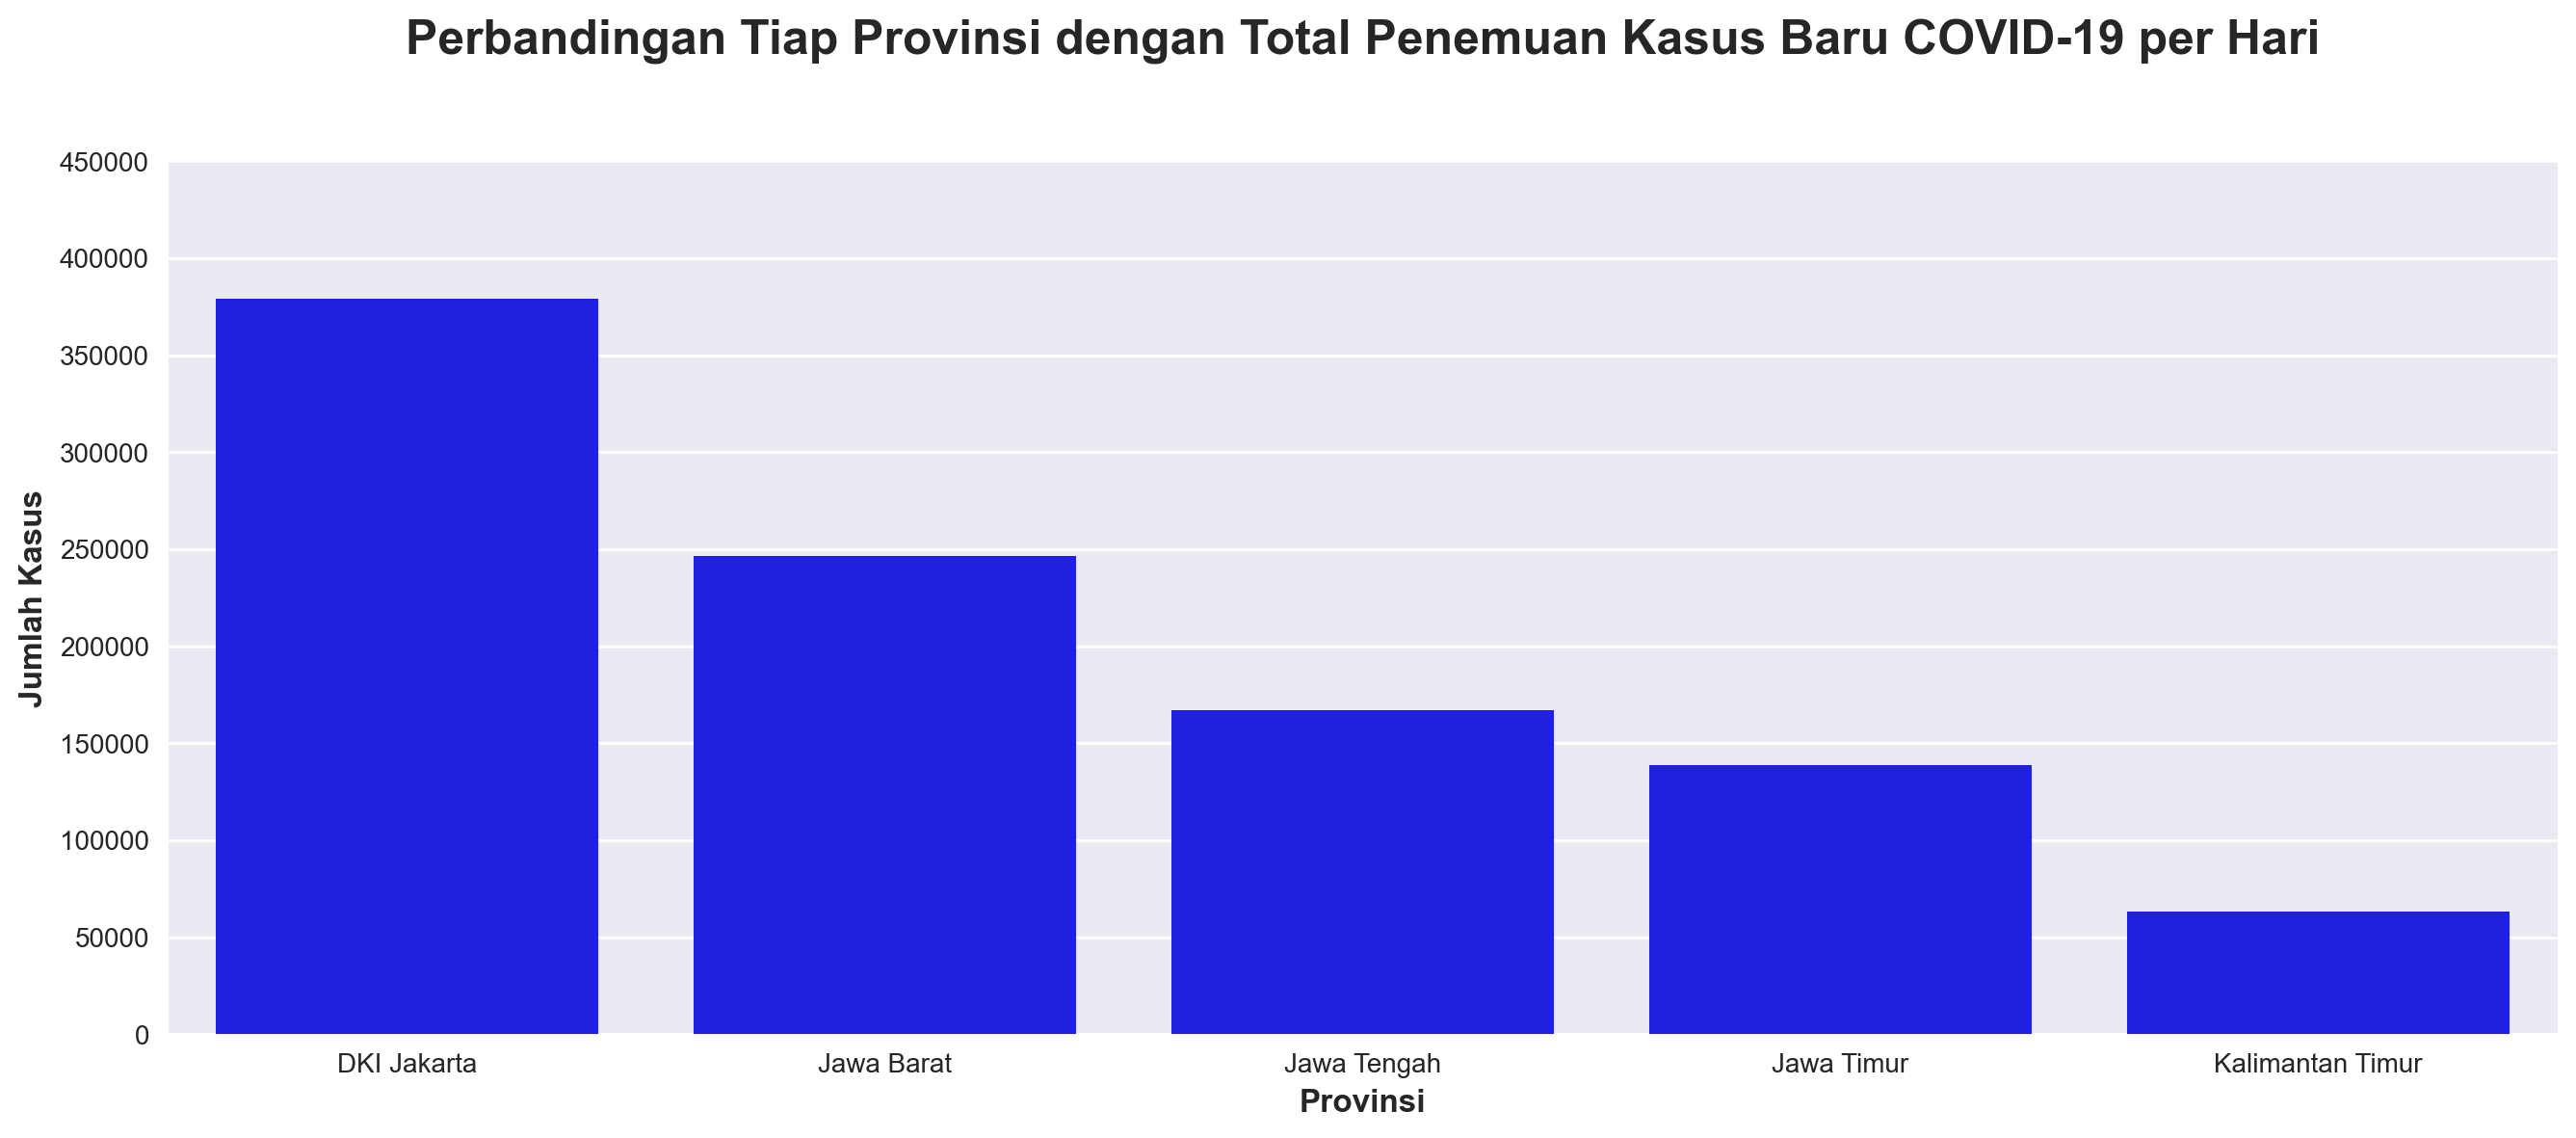

In [55]:
plt.style.use('seaborn')
fg, ax = plt.subplots(figsize=(16,6), dpi=200)
sns.barplot(x=x, y=y, color='blue')
plt.ylim(ymax=450000)
plt.title('Perbandingan Tiap Provinsi dengan Total Penemuan Kasus Baru COVID-19 per Hari', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Provinsi', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kasus', fontsize=12, fontweight='bold')
plt.show()

#### Q3: Pulau mana saja yang memiliki kasus per hari terbanyak? 

**A3.1: Pulau dengan jumlah kasus per hari terbanyak**

In [56]:
top_islands_new_cases = df.loc[df.Island != None].groupby(['Island'])[['New Cases']].sum().sort_values(by='New Cases', ascending=False)
top_islands_new_cases

,New Cases
Island,
Jawa,1000854
Sumatera,163900
Kalimantan,123987
Sulawesi,106574
Nusa Tenggara,60801
Papua,27692
Maluku,11644


**A3.2: Visualisasi perbandingan tiap pulau dengan jumlah kasus per hari terbanyak**

In [57]:
x = list(top_islands_new_cases.to_dict()['New Cases'].keys())
y = list(top_islands_new_cases.to_dict()['New Cases'].values())

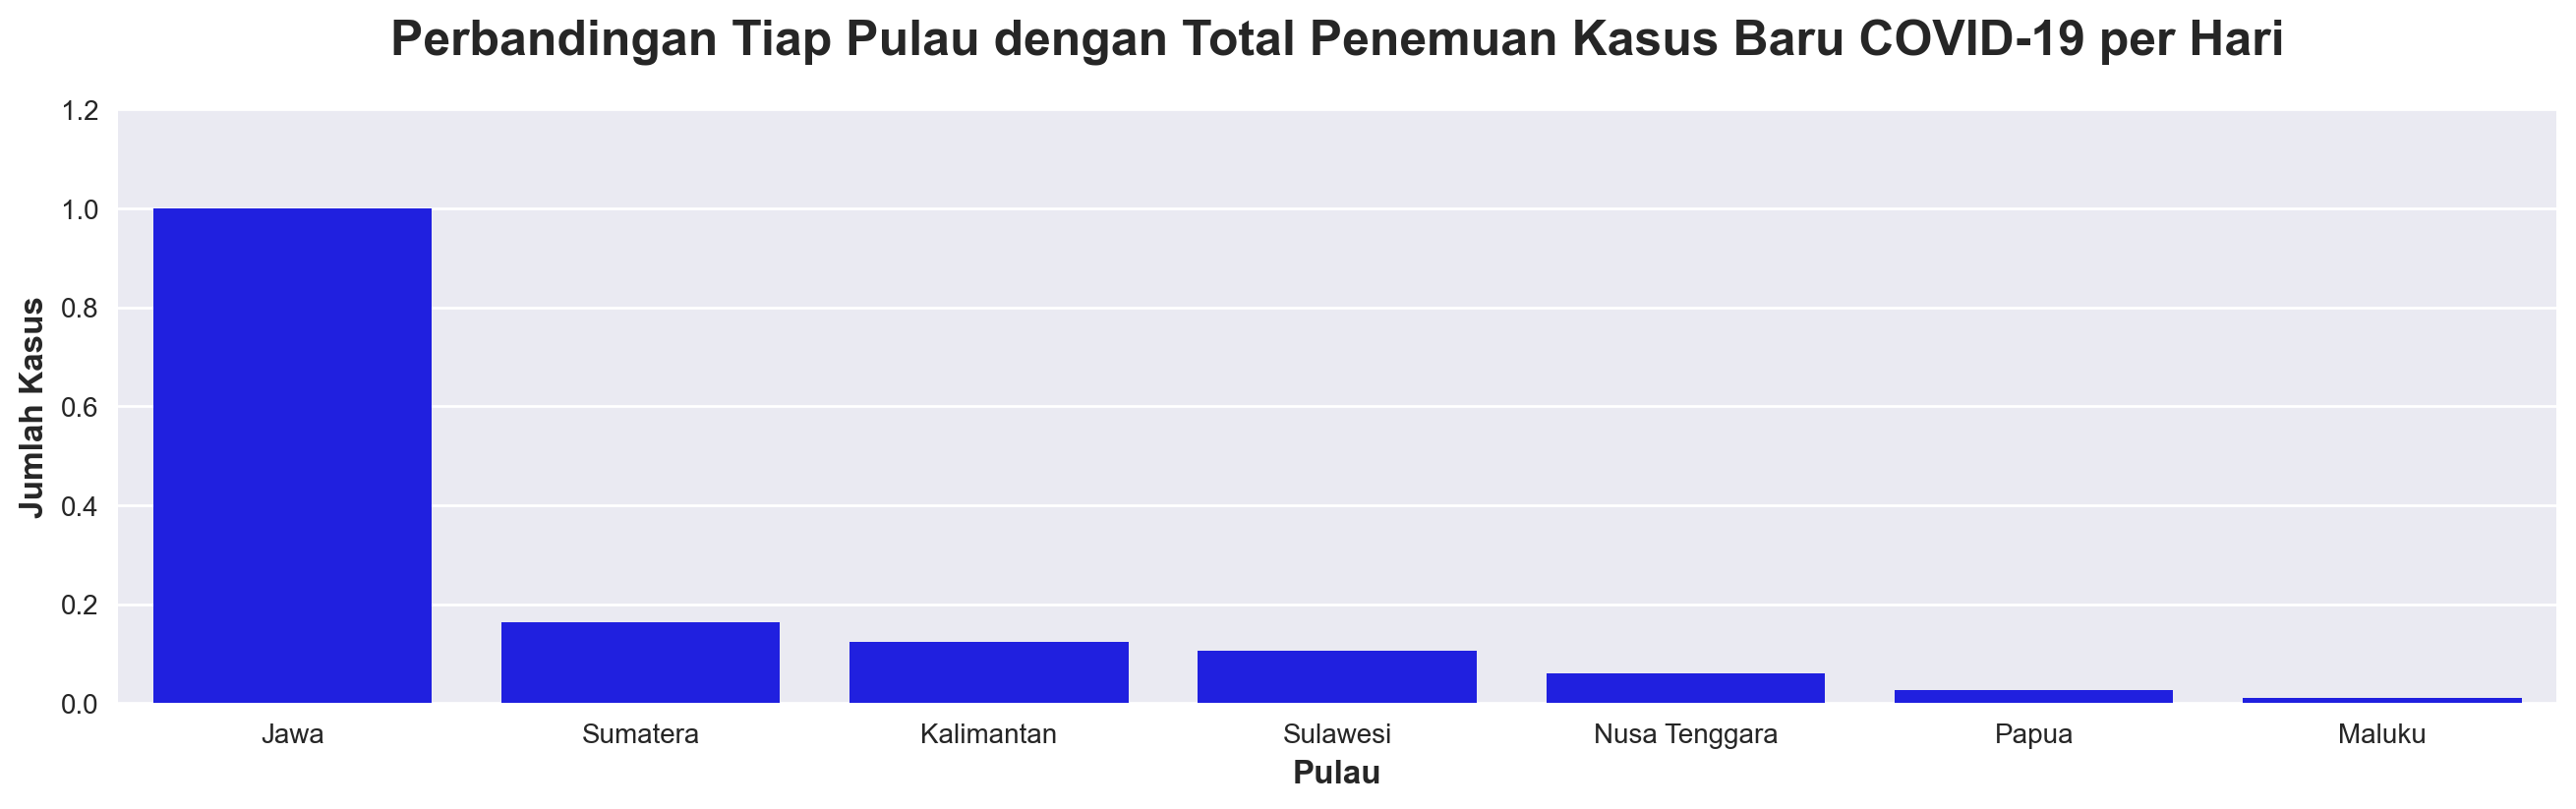

In [58]:
plt.style.use('seaborn')
fg, ax = plt.subplots(figsize=(16,4), dpi=200)
sns.barplot(x=x, y=y, color='blue')
plt.title('Perbandingan Tiap Pulau dengan Total Penemuan Kasus Baru COVID-19 per Hari', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Pulau', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kasus', fontsize=12, fontweight='bold')
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(float))
plt.show()

Berdasarkan visualisasi di atas total penemuan kasus COVID-19 per hari berpusat di pulau Jawa menembus hingga 1 juta kasus, perbandingan yang terlihat sangat mencolok jika dibandingkan dengan total penemuan kasus COVID-19 per hari di pulau lain. Hal ini cocok dengan analisa sebelumnya dimana 4 dari 5 provinsi dengan total penemuan kasus COVID-19 per hari terbanyak berada di pulau Jawa. 

#### Q4: Provinsi manakah dengan total rata-rata kesembuhan paling tinggi per hari?

**A4.1: Urutan provinsi dengan total rata-rata kesembuhan paling tinggi per hari**

In [59]:
top_province_new_rcvry = df.loc[df['Location Level'] == 'Province'].groupby(['Province'])[['New Recovered']].sum().sort_values(by='New Recovered', ascending=False)
top_province_new_rcvry[:10]

,New Recovered
Province,
DKI Jakarta,365561
Jawa Barat,218851
Jawa Tengah,124004
Jawa Timur,122900
Kalimantan Timur,58096
Sulawesi Selatan,57079
Bali,35355
Riau,32123
Sumatera Barat,29607


**A4.2: Visualisasi perbandingan provinsi dengan total rata-rata kesembuhan tertinggi per hari**

In [60]:
x = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].keys())
y = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].values())

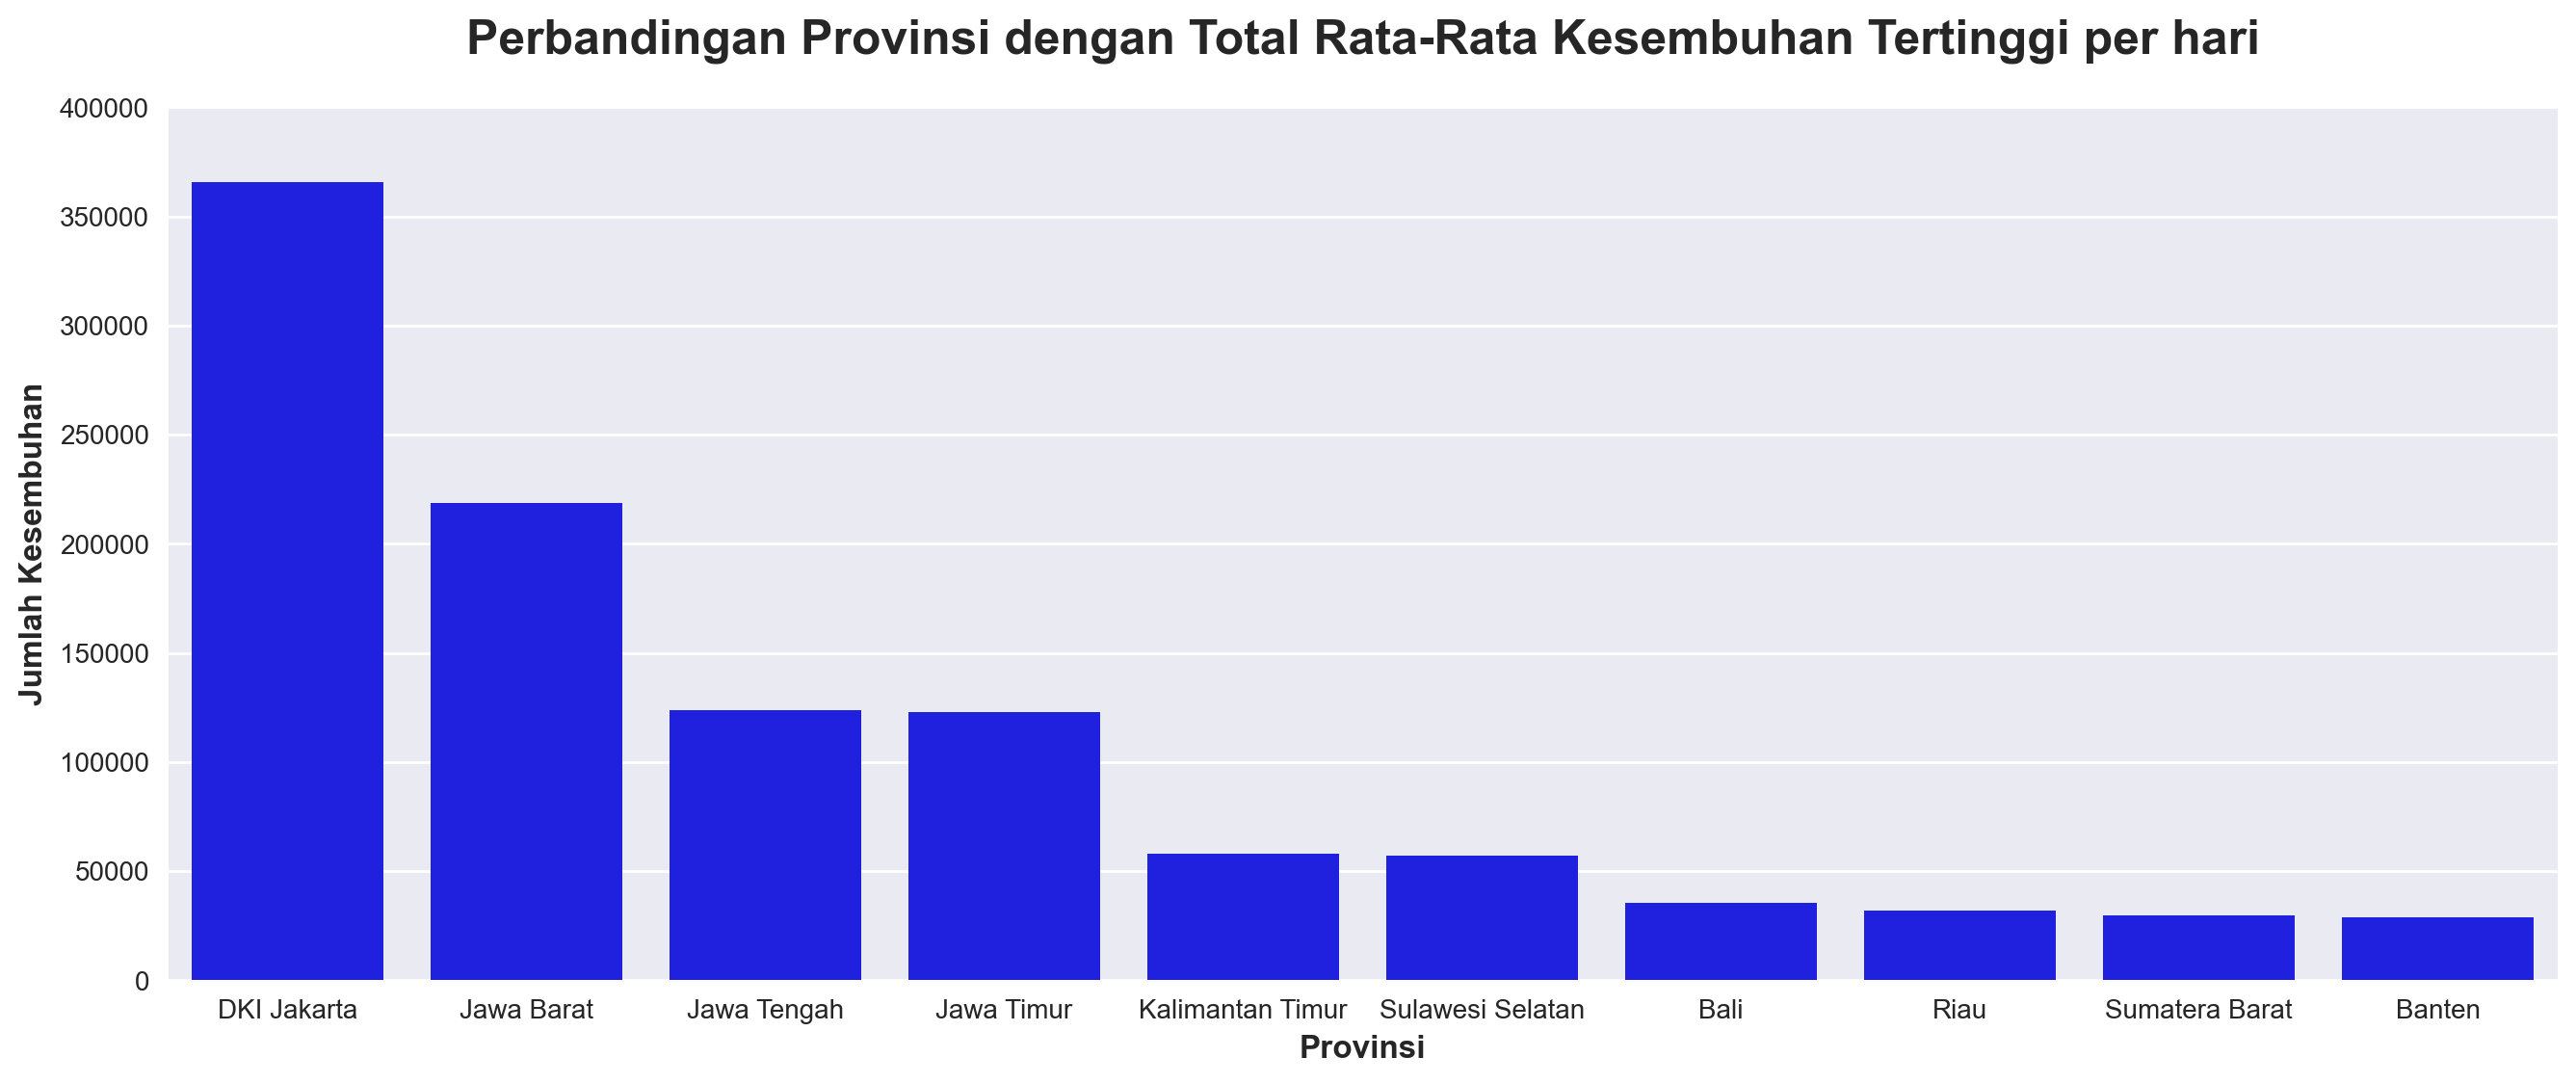

In [61]:
plt.style.use('seaborn')
fg, ax = plt.subplots(figsize=(16,6), dpi=200)
sns.barplot(x=x, y=y, color='blue')
plt.title('Perbandingan Provinsi dengan Total Rata-Rata Kesembuhan Tertinggi per hari', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Provinsi', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kesembuhan', fontsize=12, fontweight='bold')
plt.ylim(ymax=400000)
plt.show()

In [63]:
# plt.style.use('ggplot')
# fg, ax = plt.subplots(figsize=(20, 8))
# sns.barplot(x=df['Province'] ,y=df['Total Cases'])
# plt.xticks(rotation=70)
# plt.show()